## Jupyter Notebooks for HTEM Deposition/Characterization Analysis
### Notebook 2: X-Ray Diffraction: Peak Detection and Clustering Techniques

##### This Jupyter notebook is meant to give a demonstration of how X-Ray Diffraction spectra may be analyzed within Jupyter Notebooks. Basic plotting capabilities are shown with some general directions given for peak detection and clustering of various spectra.


In [2]:
#Importing the necessary libraries
import jupyter_parse_api
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
color = sns.color_palette()

%matplotlib inline

##### Basics of Spectra Plotting
Below is the first plotting example for an xrd spectrum. To query, one first selects a position to analyze. The Pandas DataFrame that is returned may then be broken up into its substituent components, namely the incidence angle of the diffraction (xrd_angle), the intensity at that incidence (xrd_intensity), and the background subtraction, which is assessed within the API using a Gaussian smoothing.

In [19]:
def xrd_visualize(selected_position,data='both',graph=True):
    xrd_df = jupyter_parse_api.htem_data_collect([selected_position],['xrd_all'])
    xrd_angles = xrd_df.values.tolist()[0][0]
    xrd_intensity = xrd_df.values.tolist()[2][0]
    xrd_background = xrd_df.values.tolist()[1][0]
    xrd_background_subtracted = []
    for i in range(0,len(xrd_background)):
        xrd_background_subtracted.append(xrd_intensity[i]-xrd_background[i])
    sorted_xrd = sorted(zip(xrd_angles,xrd_intensity,xrd_background,xrd_background_subtracted),key = lambda x: x[0])
    xrd_angles = [x[0] for x in sorted_xrd]
    xrd_intensity = [x[1] for x in sorted_xrd]
    xrd_background = [x[2] for x in sorted_xrd]
    xrd_background_subtracted = [x[3] for x in sorted_xrd]
    if data == 'both':
        if graph==True:
            plt.figure()
            plt.title('X-Ray Diffraction Spectrum, Position '+str(selected_position))
            plt.plot(xrd_angles,xrd_intensity,label='XRD Intensity')
            plt.plot(xrd_angles,xrd_background,label='XRD Background')
            plt.legend()
            plt.xlabel('Angle (2*Theta)')
            plt.ylabel('Intensity (unitless)')
            plt.show()

            plt.figure()
            plt.title('X-Ray Diffraction Spectrum, Position '+str(selected_position)+' (Background Subtracted)')
            plt.plot(xrd_angles,xrd_background_subtracted,label='XRD Background Subtracted')
            plt.legend()
            plt.xlabel('Angle (2*Theta)')
            plt.ylabel('Intensity (unitless)')
            plt.show()
        return xrd_angles, xrd_intensity
    elif data == 'b_sub':
        if graph == True:
            plt.figure()
            plt.title('X-Ray Diffraction Spectrum, Position '+str(selected_position)+' (Background Subtracted)')
            plt.plot(xrd_angles,xrd_background_subtracted,label='XRD Background Subtracted')
            plt.legend()
            plt.xlabel('Angle (2*Theta)')
            plt.ylabel('Intensity (unitless)')
            plt.show()
        return xrd_angles, xrd_background_subtracted

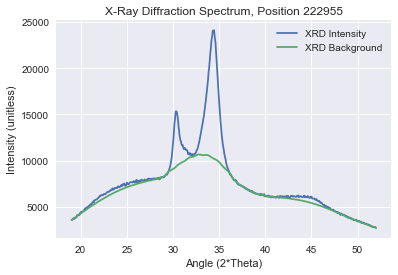

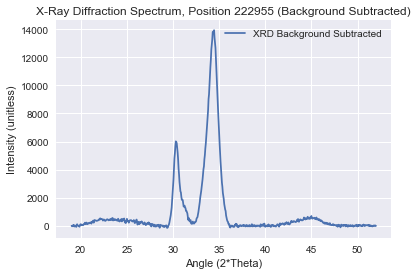

In [20]:
selected_position = 222955
xrd_angles, xrd_intensity = xrd_visualize(selected_position)

This process may be further generalized for all 44 positions within a sample. One could then get a sense of how amorphous or crystalline a sample is as it changes across a substrate.

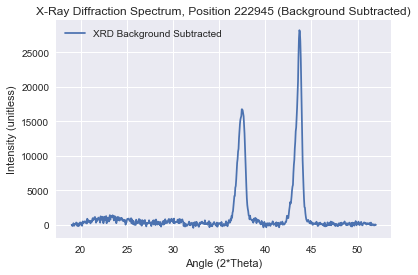

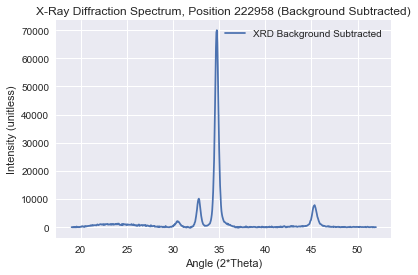

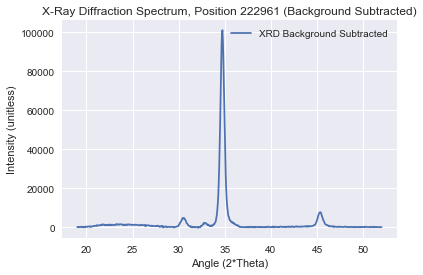

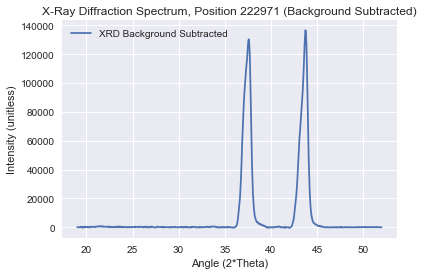

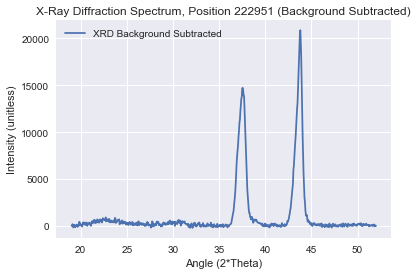

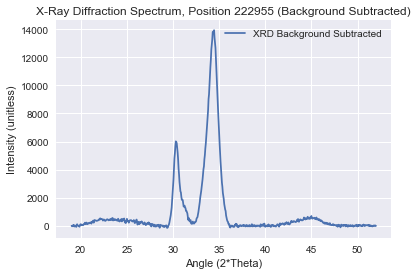

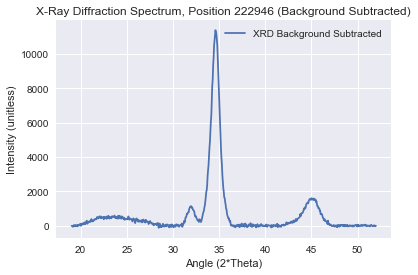

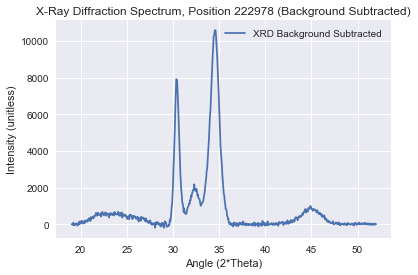

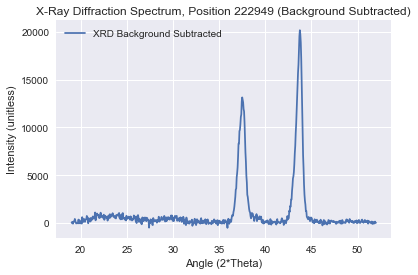

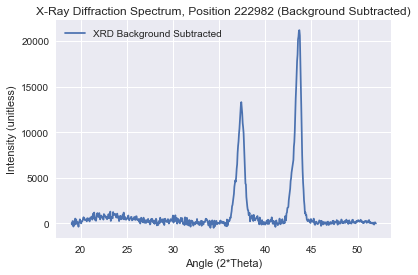

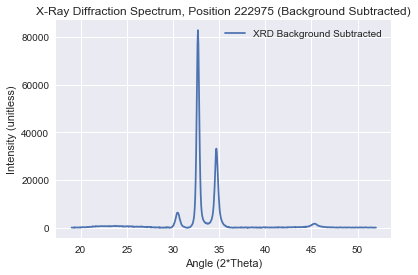

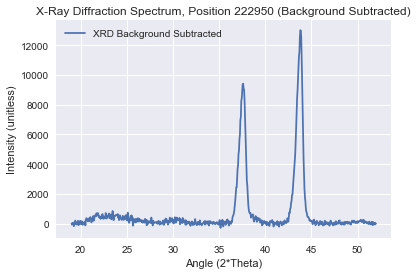

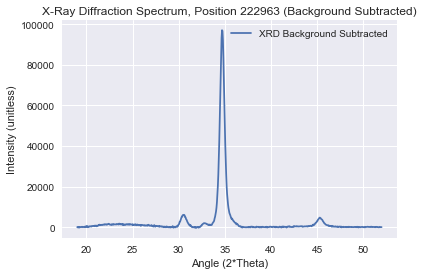

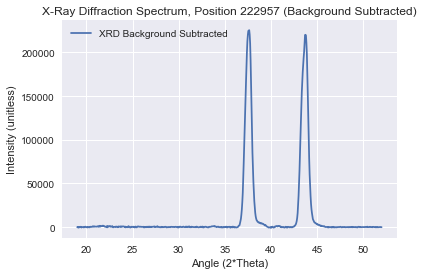

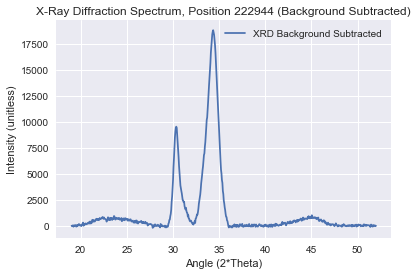

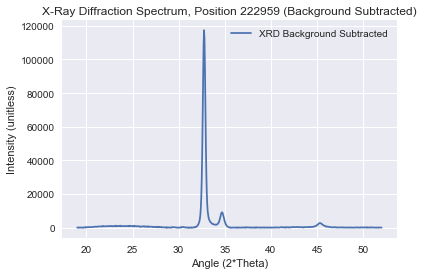

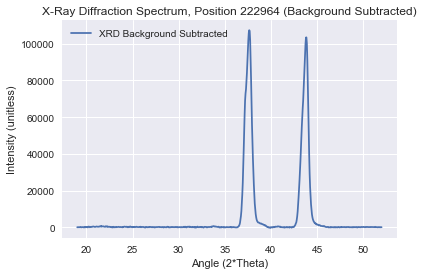

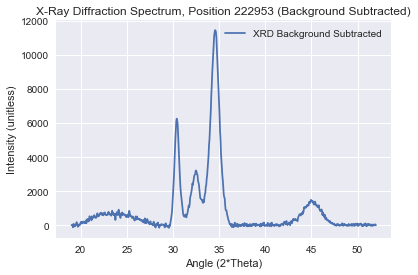

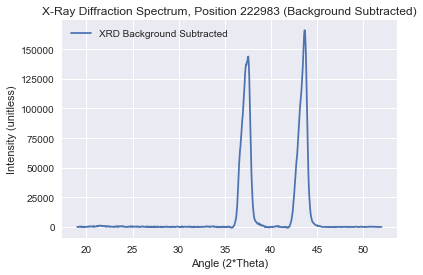

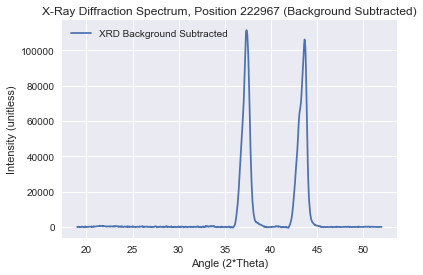

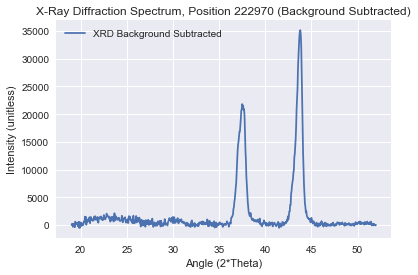

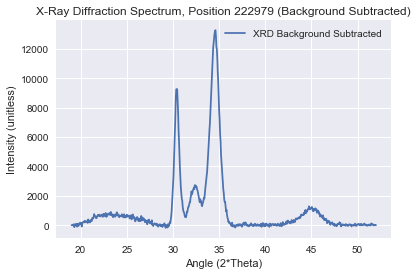

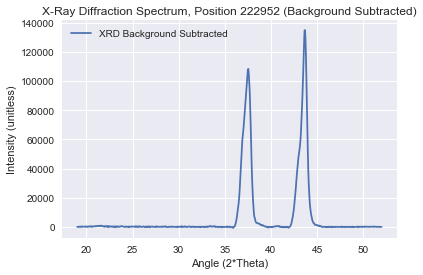

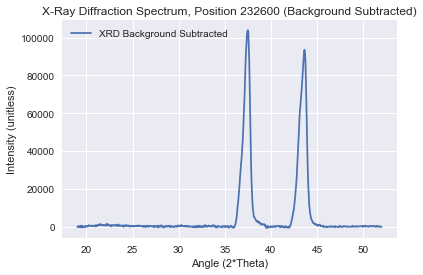

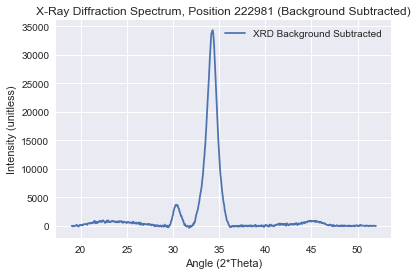

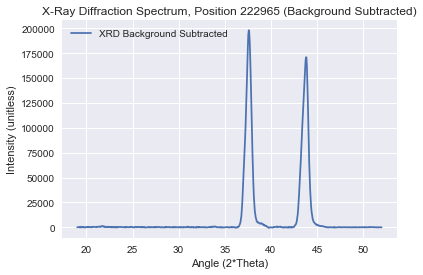

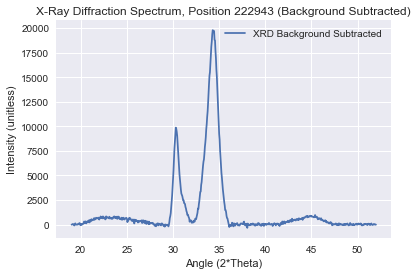

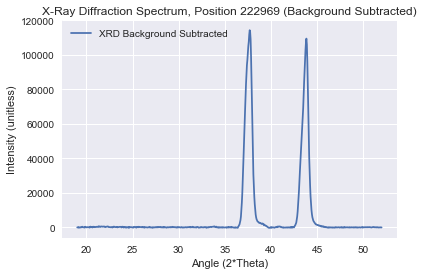

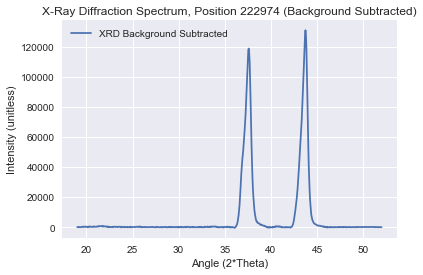

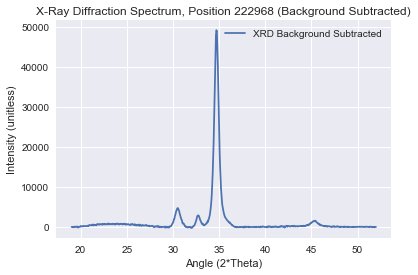

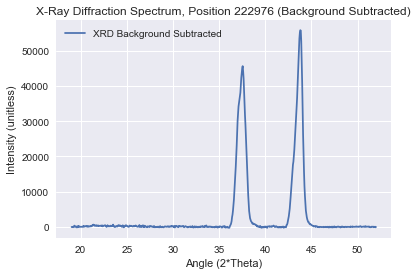

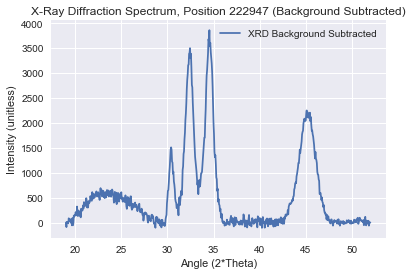

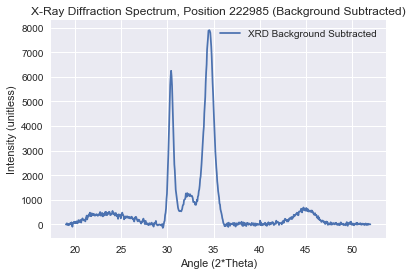

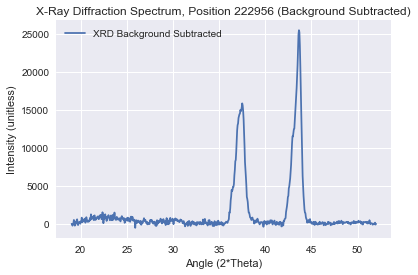

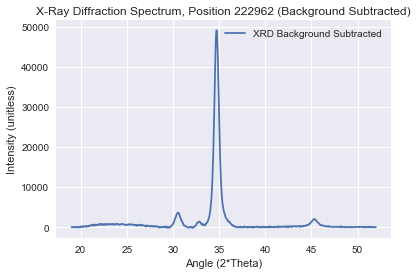

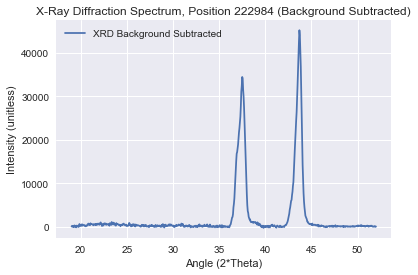

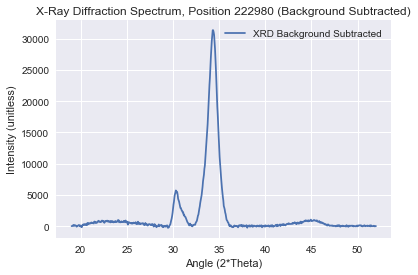

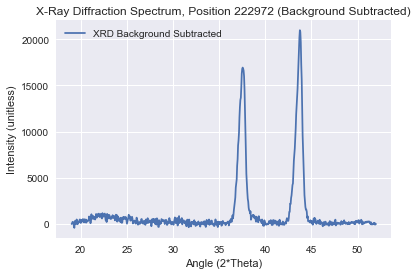

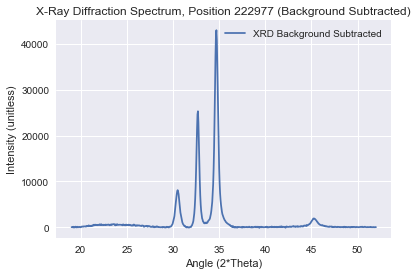

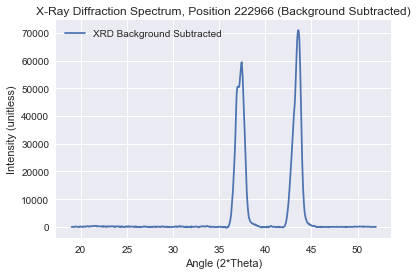

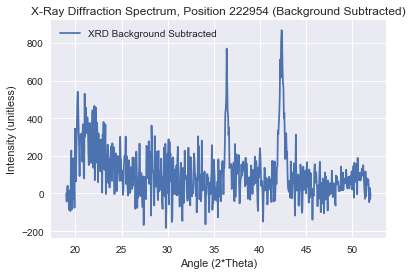

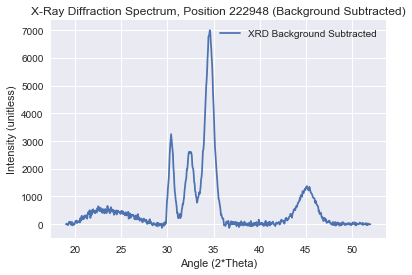

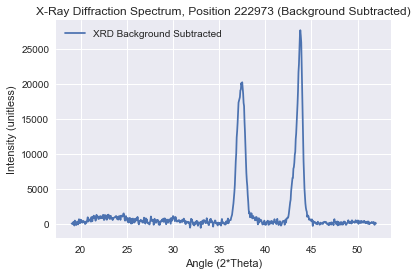

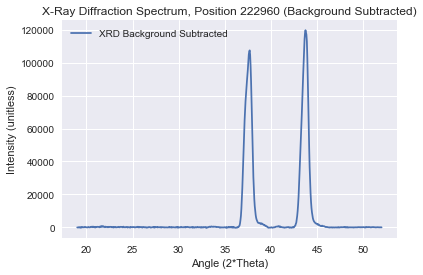

In [21]:
xrd_df = jupyter_parse_api.htem_data_collect([7229],['positions_list'])
positions_list = xrd_df.values.tolist()[0][0]
for i in positions_list:
    xrd_visualize(i,data='b_sub')


In order to attempt a clustering on the X-ray diffraction spectra, there are many proposed techniques. Kusne et. al. describe some of these methodologies in https://www.nature.com/articles/srep06367. The clustering techniques used in this paper operate on the entire x-ray diffraction spectrum, however a faster clustering approach could instead operate on just the x-ray diffraction peaks and their intensities.

First thing first, how do we isolate the peaks in the data, especially or amorphous materials? There are many ways to approach this problem. Notice that there is already a built-in program to take care of this, shown below:

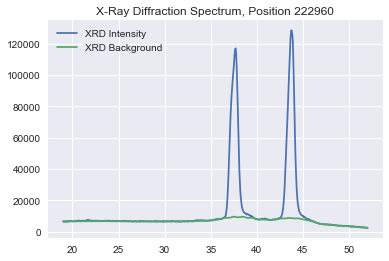

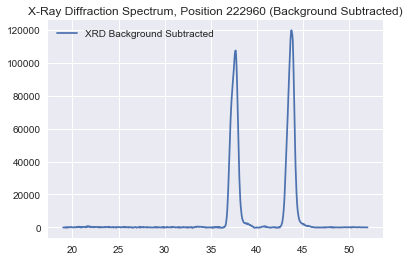

           222960
peak_count      2


In [16]:
selected_position = 222960
xrd_angles, xrd_intensity = xrd_visualize(selected_position)
print(jupyter_parse_api.htem_data_collect([222960],['xrd_peak_count']))

This seems like it does a pretty good job. However it tends to do much worse on amorphous samples. As an example:

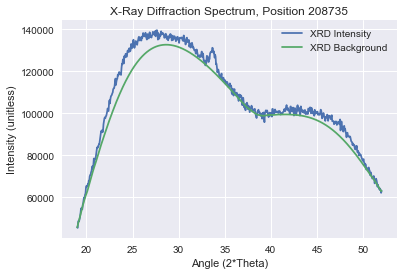

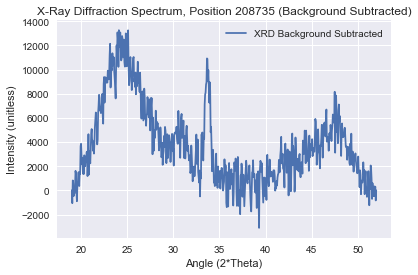

           222954
peak_count      2


In [23]:
selected_position = 208735
xrd_angles, xrd_intensity = xrd_visualize(selected_position)
print(jupyter_parse_api.htem_data_collect([222954],['xrd_peak_count']))

How many peaks are present here? It's quite difficult to tell. Should there be three peaks? Or just two, as the algorithm states? Without knowing any information about the sample composition, it's impossible to tell. And even when composition at of a sample is known, it may take an expert to identify the crystal structure. While this is a long-term goal to have a computer that can automatically match an XRD spectra up to a crystal structure, we will settle for now to determine the peaks on this graph.

While there are many, many techniques for peak analysis, we have chosen the following technique to be implemented within our database:
1. Partition the samples into loose categories of "amorphous" and "crystalline" based on their normalized integration (amorphous structures will have far higher normalized integration values than crystalline structures).
2. Apply a very rough moving average smoothing over the data, subtract the raw data from the smoothed data. This brings out peaks that may stand out to the visible eye over a large amount of noise. Spectra that is placed in the "amorphous" category from step 1 will be smoothed a lot more than spectra from the "crystalline" category.
3. Use a Wavelet Transform analysis function available from scipy, specifically: scipy.signal.find_peaks_cwt


In [ ]:
#TO BE CONTINUED...